In [1]:
# Add the Matplotlib inline magic command
%matplotlib inline

In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = os.path.join("city_data.csv")
ride_data_to_load = os.path.join("ride_data.csv")

In [4]:
# Read the city data csv file & store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Inspect the City Data DataFrame
# A. Get the columns and the rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Inspect the City Data DataFrame
# B. Make sure there are no null values
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Inspect the City Data DataFrame
# C. Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Read the ride data csv file & store it in a pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [9]:
# Inspect the Ride Data DataFrame
# A. Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Inspect the Ride Data DataFrame
# B. Make sure there are no null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Inspect the Ride Data DataFrame
# C. Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
# Merge ride_data_df & city_data_df DataFrames on "city"
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Get each type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# Create a Summary DataFrame 
# A. Calculate Total Rides for each city type
city_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
# Create a Summary DataFrame 
# B. Calculate Total Drivers for each city type
city_total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
city_total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [16]:
# Create a Summary DataFrame 
# C. Calculate Total Fares for each city type
city_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
city_total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [17]:
# Create a Summary DataFrame 
# D. Calculate Average Fare per Ride
city_avg_farePerRide = city_total_fares / city_total_rides
city_avg_farePerRide

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [18]:
# Create a Summary DataFrame 
# E. Calculate Average Fare per Driver 
city_avg_farePerDriver = city_total_fares / city_total_drivers
city_avg_farePerDriver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [19]:
# Create a Summary DataFrame 
# F. Add a list of values with keys to create the new DataFrame
city_summary_df = pd.DataFrame({
    "Total Rides": city_total_rides, 
    "Total Drivers": city_total_drivers, 
    "Total Fares": city_total_fares,
    "Average Fare per Ride": city_avg_farePerRide,
    "Average Fare per Driver": city_avg_farePerDriver})

In [20]:
# Create a Summary DataFrame 
# G. Format the city_summary_df DataFrame
city_summary_df["Total Rides"] = city_summary_df["Total Rides"].map("{:,}".format)

city_summary_df["Total Drivers"] = city_summary_df["Total Drivers"].map("{:,}".format)

city_summary_df["Total Fares"] = city_summary_df["Total Fares"].map("${:,.2f}".format)

city_summary_df["Average Fare per Ride"] = city_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

city_summary_df["Average Fare per Driver"] = city_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

In [21]:
# Remove the index name
city_summary_df.index.name = None

In [22]:
# Display the formatted DataFrame
city_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [23]:
# Rename pyber_data_df columns
pyber_data_df.columns = ['City', 'Date', 'Fare', 'Ride Id', 'No. Drivers', 'City Type']
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [24]:
# Set the index to the Date Column
pyber_data_df.set_index('Date', inplace=True)
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [25]:
# Create a new DataFrame for fares
fares_df = pyber_data_df[['City Type', 'Fare']].copy()
fares_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [26]:
# Check the data type of the index
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [27]:
# Set the index to the datatime data type
fares_df.index = pd.to_datetime(fares_df.index)

In [28]:
# Confirm the index is a datatime data type
fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [29]:
# Calculate the sum() of fares by the type of city AND date
# Convert series into DataFrame
fares_per_city_date_df = pd.DataFrame(fares_df.groupby(['Date', 'City Type']).sum()['Fare'])
fares_per_city_date_df.head()

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75


In [30]:
pyber_data_df.reset_index(inplace=True)
pyber_data_df.head()

,Date,City,Fare,Ride Id,No. Drivers,City Type
0,2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2,2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
3,2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
4,2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [31]:
pivotTable_date_city = pyber_data_df.pivot(index='Date', columns='City Type', values='Fare')
pivotTable_date_city.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [32]:
#pivotTable_date_city = pd.pivot_table(pyber_data_df, index=['Date'], values=['Fare'], columns=['City Type'])
#pivotTable_date_city.head(10)

In [33]:
JanToApril_df = pivotTable_date_city.loc['2019-01-01':'2019-04-28']
JanToApril_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [34]:
JanToApril_df.index = pd.to_datetime(JanToApril_df.index)
JanToApril_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [35]:
JanToApril_weekly_df = JanToApril_df.resample('W').sum()
JanToApril_weekly_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


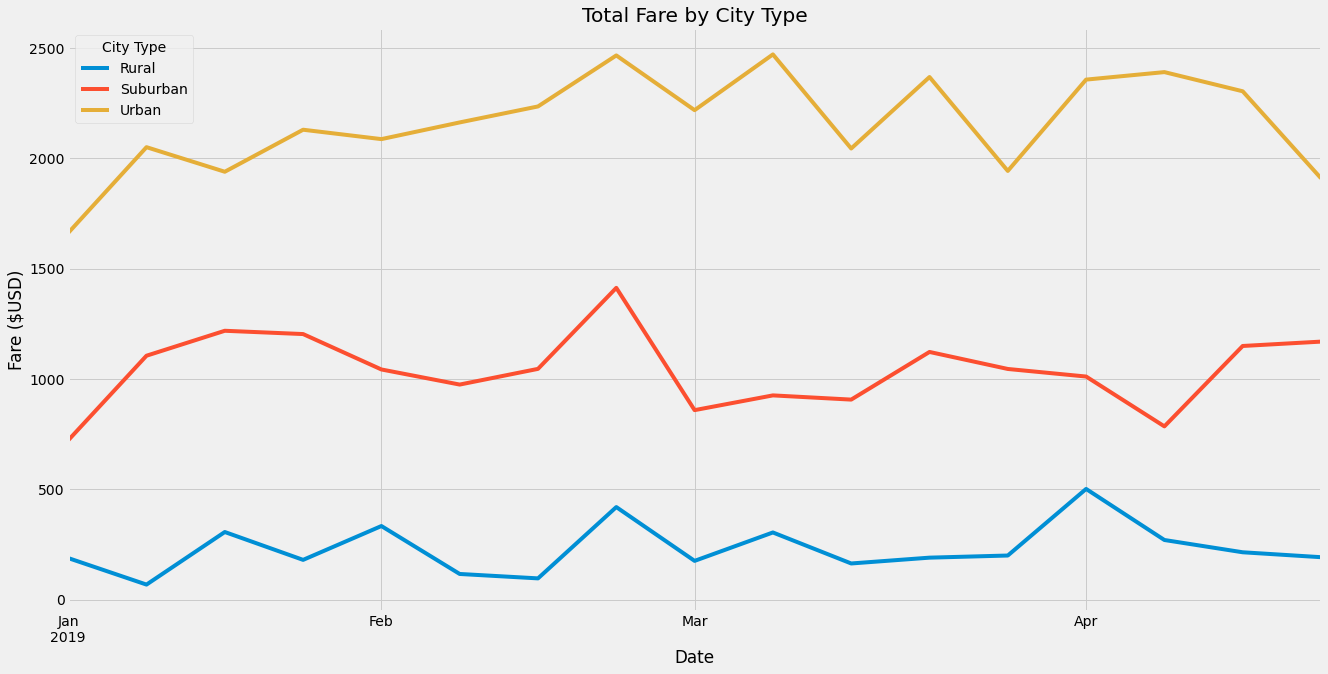

In [37]:
# Use the FiveThirtyEight graph style
plt.style.use('fivethirtyeight')
# Plot the JanToApril_weekly_df DataFrame
JanToApril_weekly_df.plot.line(figsize=(20, 10))
# Include title and axis labels
plt.ylabel('Fare ($USD)')
plt.title('Total Fare by City Type')
# Show plot
plt.show()